# Principal Component Analysis

## Generate some data

In [1]:
%pylab inline
import numpy as np
import pylab as pl

Populating the interactive namespace from numpy and matplotlib


[(0.75, -1.65), (0.74, -1.37), (0.04, -1.91), (0.98, -0.37), (1.08, -0.55), (0.79, -1.43), (1.65, -0.17), (0.44, -2.18), (1.81, -0.11), (1.82, -0.22), (0.34, -1.7), (1.39, -0.36), (1.38, -0.33), (1.33, -1.08), (1.79, 0.39), (1.27, -0.75), (-0.06, -2.64), (1.15, -1.07), (1.04, -0.89), (1.55, 0.16)]
Data array X =
[[ 0.75 -1.65]
 [ 0.74 -1.37]
 [ 0.04 -1.91]
 [ 0.98 -0.37]
 [ 1.08 -0.55]
 [ 0.79 -1.43]
 [ 1.65 -0.17]
 [ 0.44 -2.18]
 [ 1.81 -0.11]
 [ 1.82 -0.22]
 [ 0.34 -1.7 ]
 [ 1.39 -0.36]
 [ 1.38 -0.33]
 [ 1.33 -1.08]
 [ 1.79  0.39]
 [ 1.27 -0.75]
 [-0.06 -2.64]
 [ 1.15 -1.07]
 [ 1.04 -0.89]
 [ 1.55  0.16]]


(-0.15400000000000003, 1.9140000000000001, -2.7915, 0.5415000000000001)

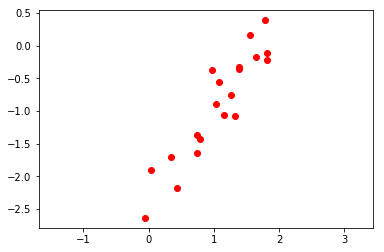

In [2]:
# parameters 
n_points=20           # number of points
rot=3.141592658/3     # rotation
sigma_1=0.8           # standard deviation 1
sigma_2=0.2           # standard deviation 2
off_1= 1
off_2=-1

np.random.seed(13154)    # fix the seed of the random number generator so we can reproduce the same data
#np.random.seed(13254)     # fix the seed of the random number generator so we can reproduce the same data

# compute the data
t1=np.random.normal( scale=sigma_1,size=n_points)
t2=np.random.normal( scale=sigma_2,size=n_points)

a=cos(-rot)
b=sin(-rot)
x1 =  a*t1+b*t2+off_1
x2 = -b*t1+a*t2+off_2

x1=x1.round(2)
x2=x2.round(2)


print zip(x1,x2)
X_orig=np.array([x1,x2]).T
print 'Data array X =\n', X_orig

# show the data
pl.plot(x1,x2,"ro",label="measurements")
pl.axis('equal')

## Subtract out the mean

[[-0.314  -0.7385]
 [-0.324  -0.4585]
 [-1.024  -0.9985]
 [-0.084   0.5415]
 [ 0.016   0.3615]
 [-0.274  -0.5185]
 [ 0.586   0.7415]
 [-0.624  -1.2685]
 [ 0.746   0.8015]
 [ 0.756   0.6915]
 [-0.724  -0.7885]
 [ 0.326   0.5515]
 [ 0.316   0.5815]
 [ 0.266  -0.1685]
 [ 0.726   1.3015]
 [ 0.206   0.1615]
 [-1.124  -1.7285]
 [ 0.086  -0.1585]
 [-0.024   0.0215]
 [ 0.486   1.0715]]


(-1.2180000000000002, 0.85, -1.8800000000000001, 1.4529999999999998)

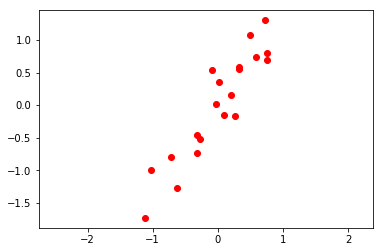

In [3]:
X=X_orig-X_orig.mean(axis=0)
print X
pl.plot(X[:,0],X[:,1],"ro",label="measurements")
pl.axis('equal')

In [4]:
# compute eigenvectors of $X^t X$
XtX=X.T.dot(X)
print "X^t X=\n",XtX

X^t X=
[[ 6.07348   8.16922 ]
 [ 8.16922  12.898655]]


In [5]:
tr=XtX.trace()
dt=XtX[0,0]*XtX[1,1]-XtX[0,1]*XtX[1,0]
sq=sqrt(tr*tr/4-dt)
l1= tr/2+sq
l2= tr/2-sq

q11= XtX[0,1]
q12= -(XtX[0,0]-l1)
q22= XtX[0,0]-l2
q1 = np.array([q11,q12])/sqrt(q11*q11+q12*q12)
q2 = np.array([-q11,q22])/sqrt(q11*q11+q22*q22)

print "eigenvalues", l1,l2
print "eigenvector_1", q1
print "eignevector_2", q2
print "orthogonal?", q1[0]*q2[0] + q1[1]*q2[1]

eigenvalues 18.33942329616883 0.632711703831168
eigenvector_1 [0.55432078 0.83230311]
eignevector_2 [-0.83230311  0.55432078]
orthogonal? 0.0


(-1.2180000000000002, 0.85, -1.8800000000000001, 1.4529999999999998)

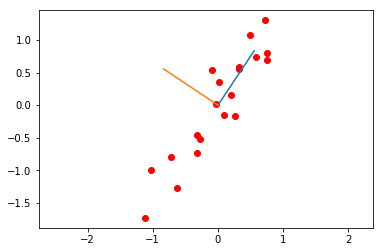

In [6]:
pl.plot(X[:,0],X[:,1],"ro",label="measurements")
pl.plot([0,q1[0]],[0,q1[1]])
pl.plot([0,q2[0]],[0,q2[1]])
pl.axis('equal')


In [40]:
pl.axes?